In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from matplotlib import pyplot as plt
plt.style.use('dark_background')

After we add the initial imports we can check our data for a first glance.

In [ ]:
data=pd.read_csv('M:\\Mitsos\\Uni\\examino_6\\data_analytics\\final_assignment\\data\\bank-additional-full.csv',sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Our data has 21 columns , being mixed between categorical , numerical , binary (nominal) data and an extra columns (the last one) which represents the actual outcome we want to predict , if a client is opened a bank term deposit or not.
The columns 'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed' are not results from the marketing campaign , but indexes about the economy,consumer purchasing power and confidence etc.,and are based on the time the client was contacted

In [ ]:
data.columns , data.shape


(Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
       dtype='object'),
 (41188, 21))

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Let's check if there are any missing values in any field.

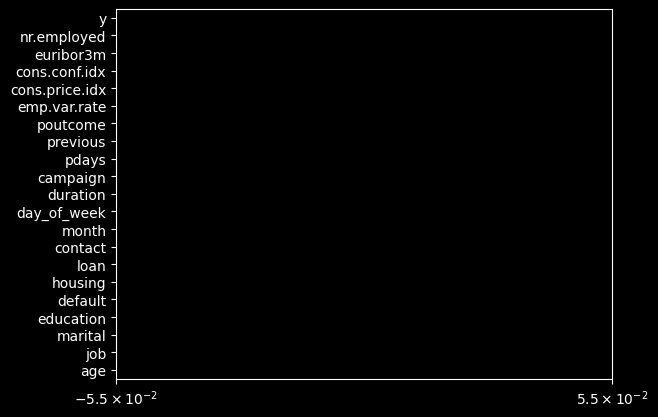

In [ ]:
fig, ax = plt.subplots(1, 1)
data.isna().sum().plot.barh(ax=ax)

ax.set_xscale('symlog')

We have no missing (NaN) prices in our data.Now lets check our nominal/categorical data.

In [ ]:
nominal = data.select_dtypes(exclude=["number","bool_"])
print("Unique values per nominal/categorical columns:")
for column in nominal.columns:
    print("------")
    print(column,":",getattr(nominal,column).unique())


Unique values per nominal/categorical columns:
------
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------
marital : ['married' 'single' 'divorced' 'unknown']
------
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------
default : ['no' 'unknown' 'yes']
------
housing : ['no' 'yes' 'unknown']
------
loan : ['no' 'yes' 'unknown']
------
contact : ['telephone' 'cellular']
------
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
------
poutcome : ['nonexistent' 'failure' 'success']
------
y : ['no' 'yes']


We can see that we have the value 'unknown' in most of the categorical fields of the dataset , which maybe means these values are missing or were not provided during the marketing campaign.

Let's create some plots on the categorical fields first to get a better view of our data.

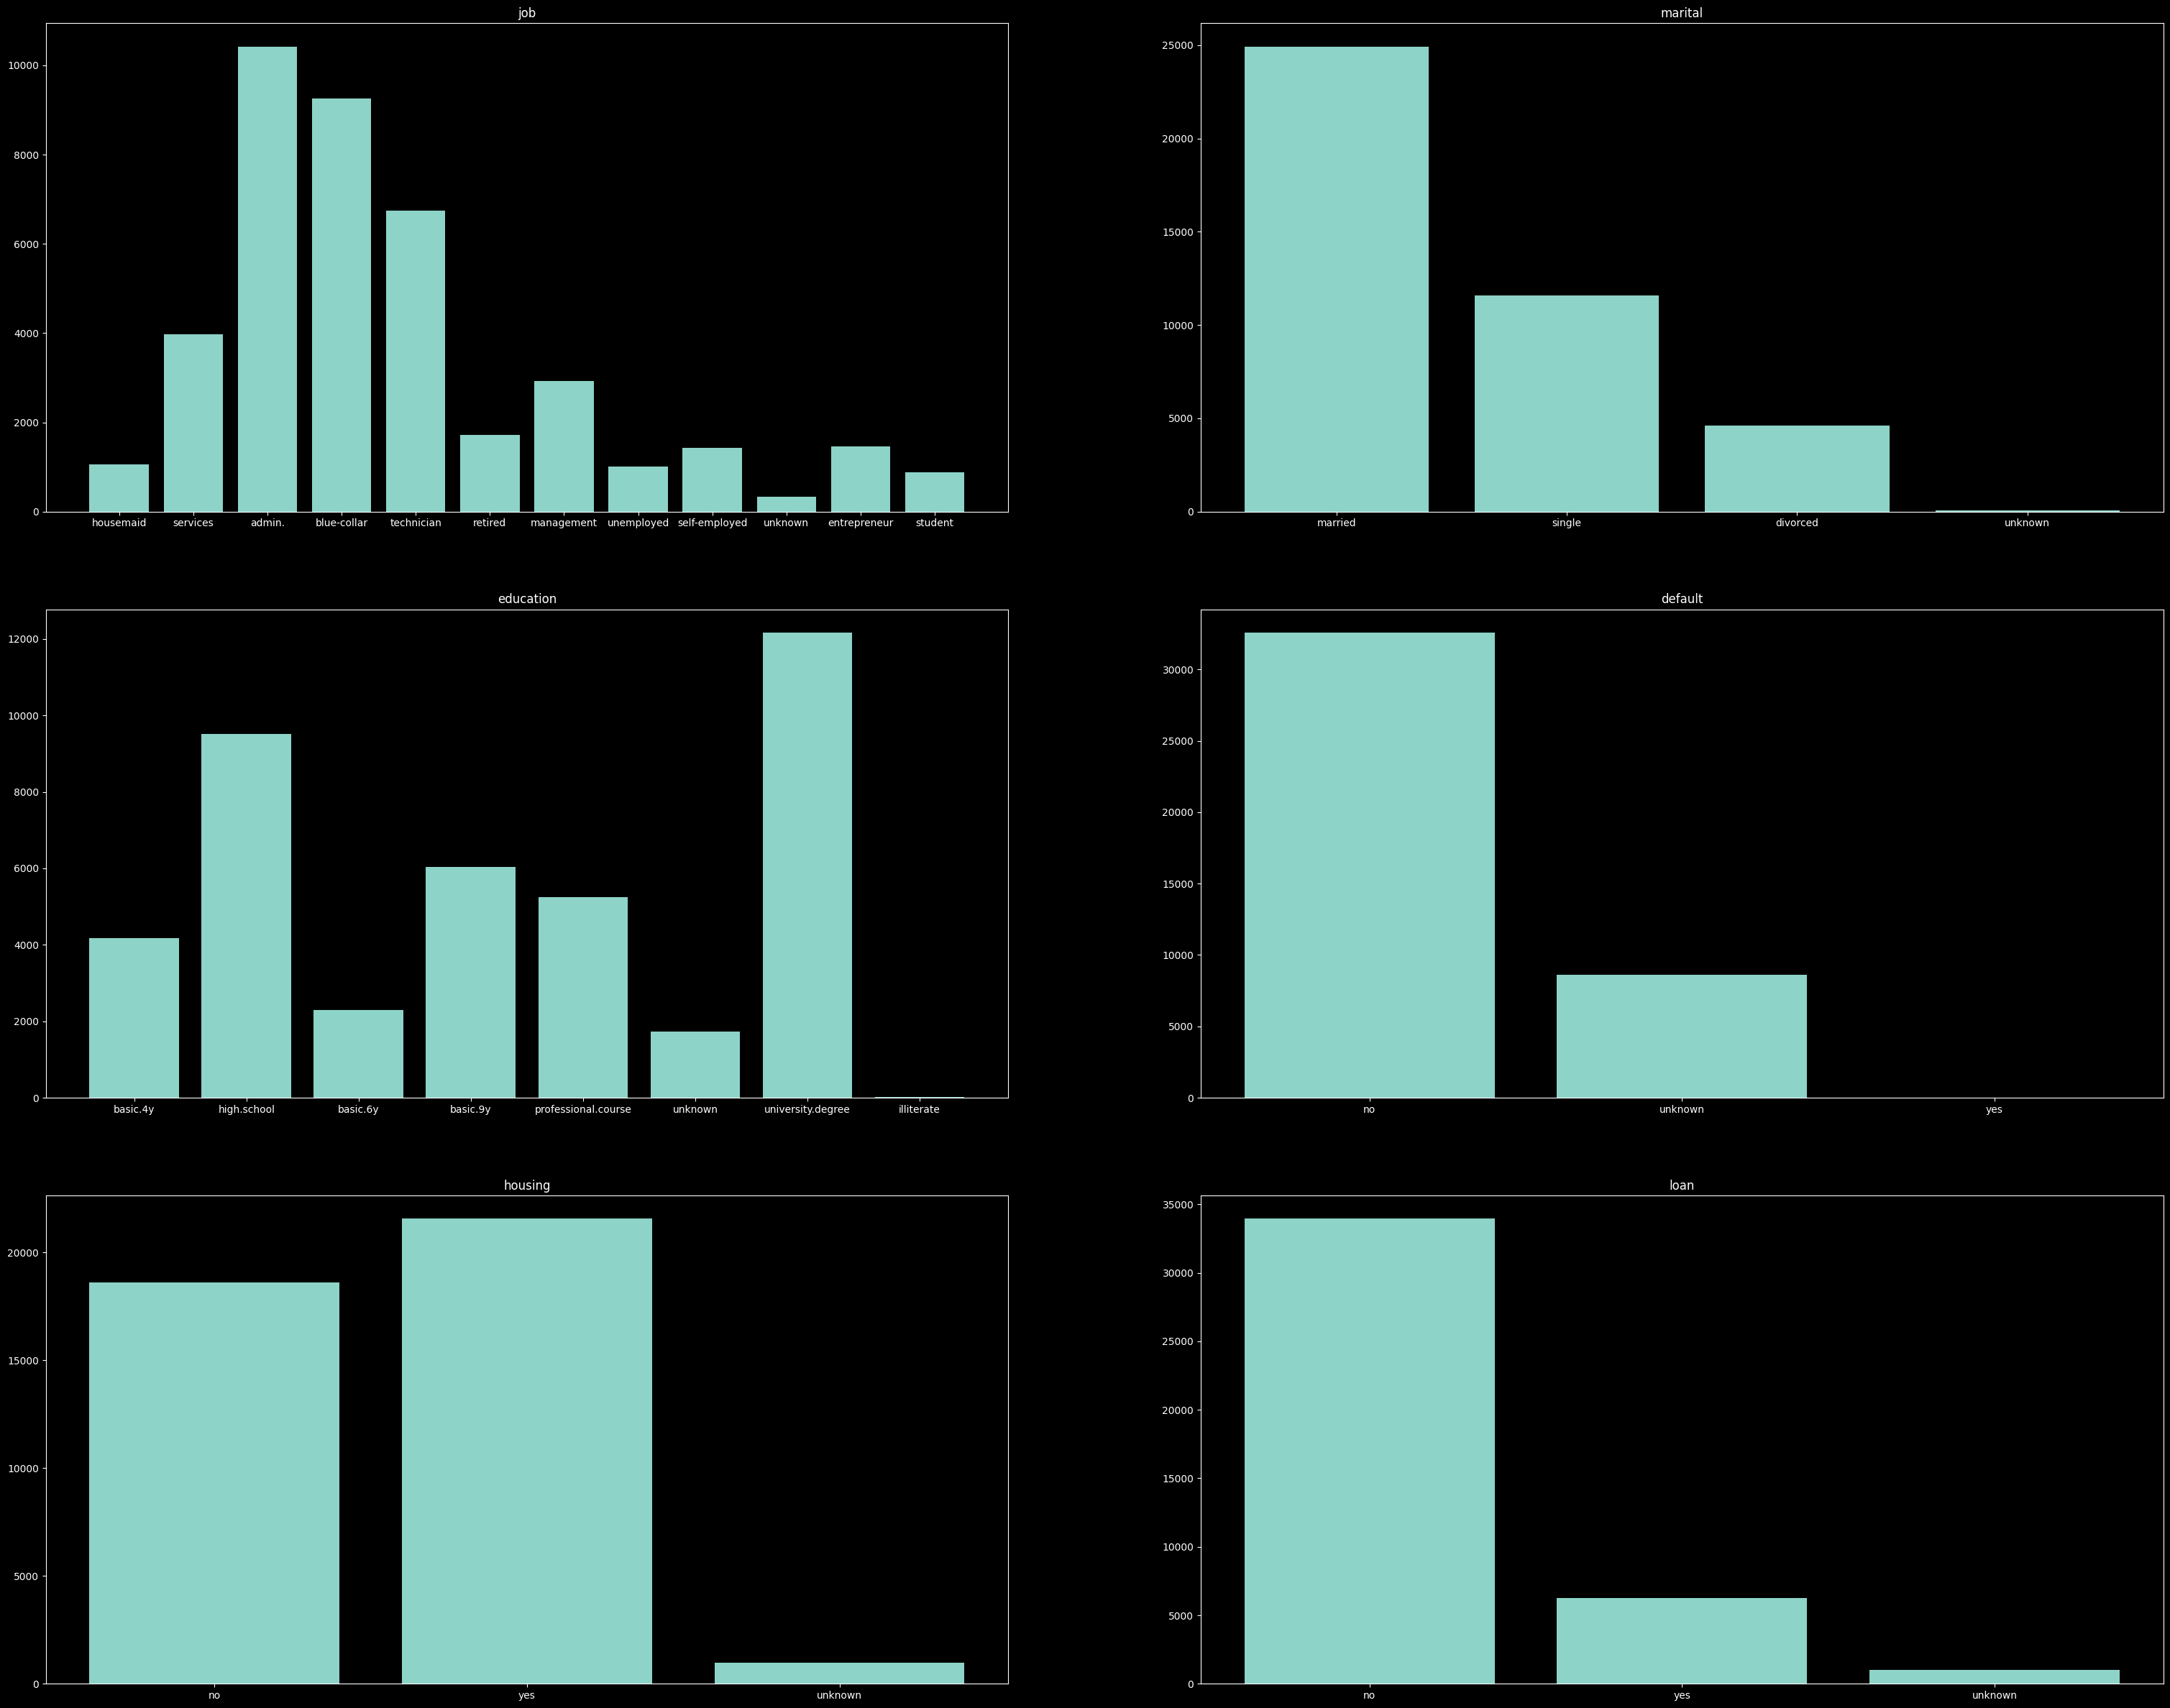

In [ ]:
nominal_cols_of_interest=['job','marital','education','default','housing','loan']
dic ={}
fig,ax=plt.subplots(3,2,figsize=(38,30))
i=0
for column in nominal_cols_of_interest:
    dic={}
    unique_vals=getattr(data,column).unique()
    for unique_val in unique_vals:
        sum=data[column].value_counts()[unique_val]
        dic[unique_val]=sum
    ax[i//2,i%2].title.set_text(column)
    ax[i//2,i%2].bar(list(dic.keys()),list(dic.values()))
    i+=1


As we can see , the 'default' column is mostly comprised of 'no' values and then 'unknown'.This means that it doesnt provide us with any vital information about the data and may confuse learning models down the road , so i will go ahead and drop it.

In [ ]:
data=data.drop(['default'],axis=1)

Now we will create some plots for the other nominal/categorical fields that have to do about the marketing campaign.
campaign column keeps count of how many times a client was contacted during this campaign
pdays column keeps count of how many days have passed since a client was last contacted.If a client was never contacted before , the value is 999.
previous column keeps count of how many times a client was contacted before this campaign.
poutcome keeps the outcome of the previous marketing campaign.

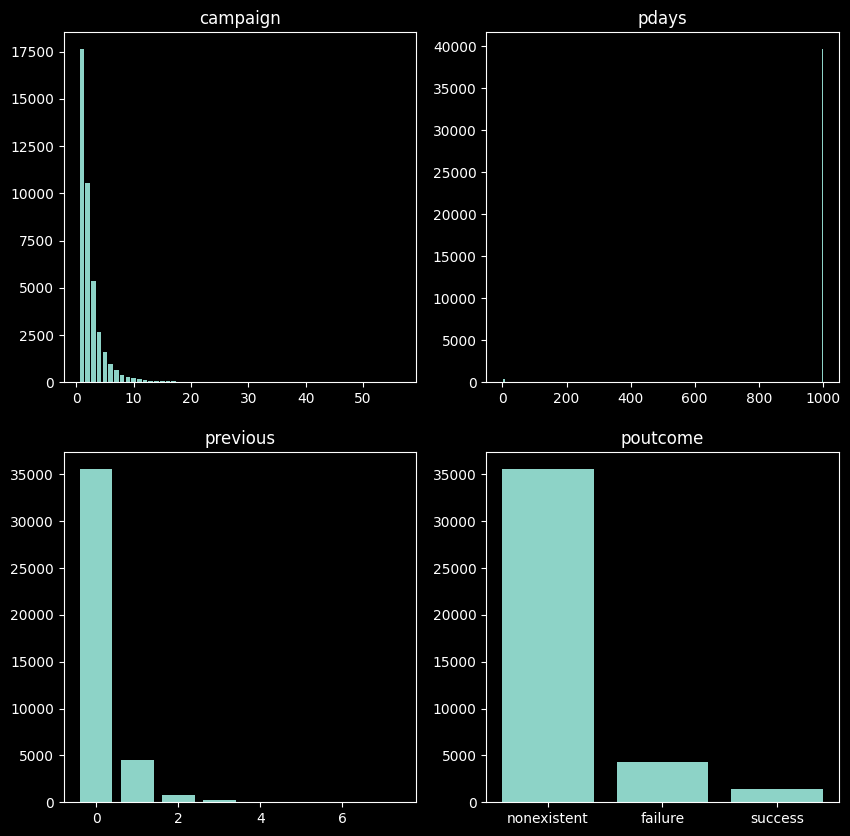

In [ ]:
campaign_cols=['campaign','pdays','previous','poutcome']

fig,ax=plt.subplots(2,2,figsize=(10,10))
i=0
for campaign_col in campaign_cols:
    dic={}
    unique_vals = getattr(data,campaign_col).unique()
    for unique_val in unique_vals:
        sum=data[campaign_col].value_counts()[unique_val]
        dic[unique_val]=sum
    ax[i//2,i%2].title.set_text(campaign_col)
    ax[i//2,i%2].bar(list(dic.keys()),list(dic.values()))
    i+=1

As we can see most clients were contacted first during this campaign , also for most clients we dont know the outcome of the previous campaign , probably because they were not contacted before.
Let's check now how many of those clients where not contacted before (poutcome=unknown)

In [ ]:
prev_unknown=data.query("poutcome=='nonexistent'")
print("Clients that we don't know the outcome of the last campaign: ",prev_unknown.shape[0],
"\nClients that we know they were not previously contacted and we dont know the outcome of the previous campaign:",prev_unknown[prev_unknown.pdays==999].shape[0],
"\nClients that were not contacted before: ",prev_unknown[prev_unknown.previous==0].shape[0])

Clients that we don't know the outcome of the last campaign:  35563 
Clients that we know they were not previously contacted and we dont know the outcome of the previous campaign: 35563 
Clients that were not contacted before:  35563


We can now search for the value 'unknown' in the dataset to see which records have missing values.

In [ ]:
lost_data=data[data.apply(lambda row: row.astype(str).str.contains(('unknown'), case=False).any(), axis=1)]
lost_data.shape[0]

10700

We have 10700 records/rows with data missing in at least on column.This is a large part of our dataset so i will not drop them for now.

Our data is already prelabeled , the column 'y' contains the actual result of the marketing campaign.

In [ ]:
data[data.y=='yes'].shape[0]/data.shape[0]

0.11265417111780131

Only 11% of the people contacted actually subscribed , which means our dataset is heavily skewed towards the negative-'no' class.
We will keep this in mind because later , during clustering and classification , we may need to undersample the majority class in order to draw conclusions.

Moving on now , we will continue with preprocessing our data using standard statistical methods and trying to find simple 'trends'.
Let's create a histogram for the age first.

Text(0, 0.5, '#People')

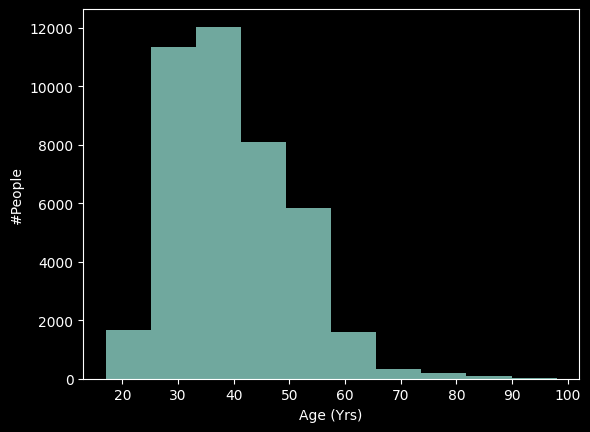

In [ ]:
fig,ax = plt.subplots(1,1)

data.age.plot.hist(alpha=.8, ax=ax)
ax.set_xlabel('Age (Yrs)')
ax.set_ylabel('#People')


We will create some density plots for all of our numeric fields.

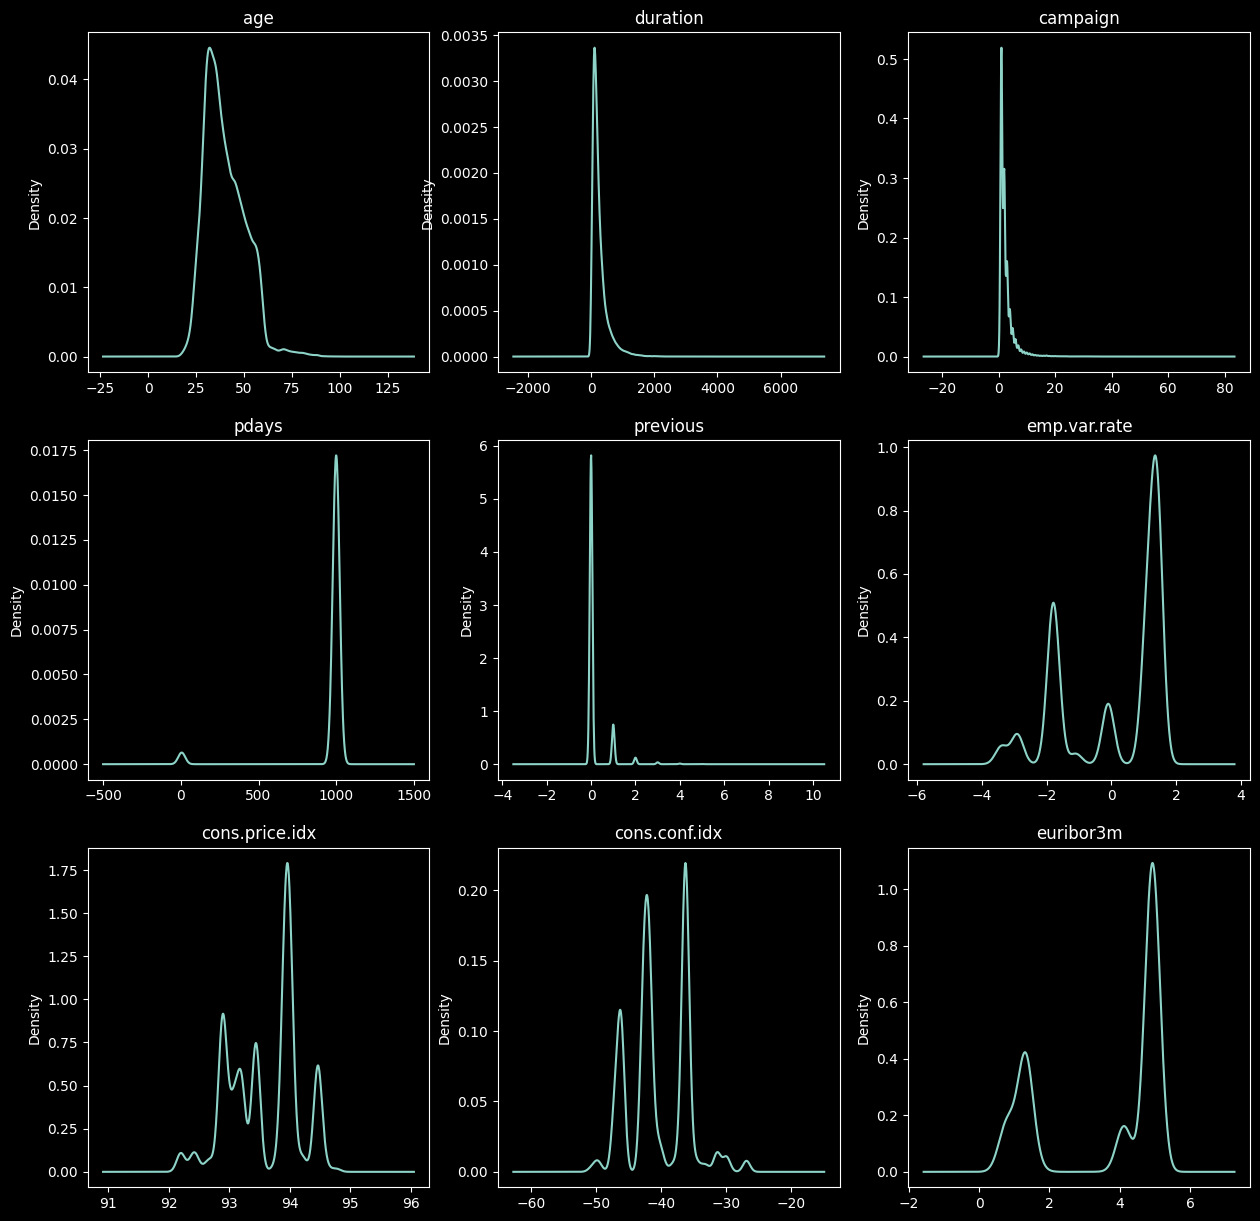

In [ ]:
numeric_cols=data.select_dtypes('number').columns 

fig,ax=plt.subplots(3,3,figsize=(15,15))

for idx, (ax_i, feat) in enumerate(zip(ax.flatten(), numeric_cols)):
    data[feat].plot.density(ax=ax_i)
    ax_i.set_title(feat)

Now we will try to see if any correlation exists in our numeric data.

In [ ]:
data.select_dtypes('number').corr(method='pearson')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot: >

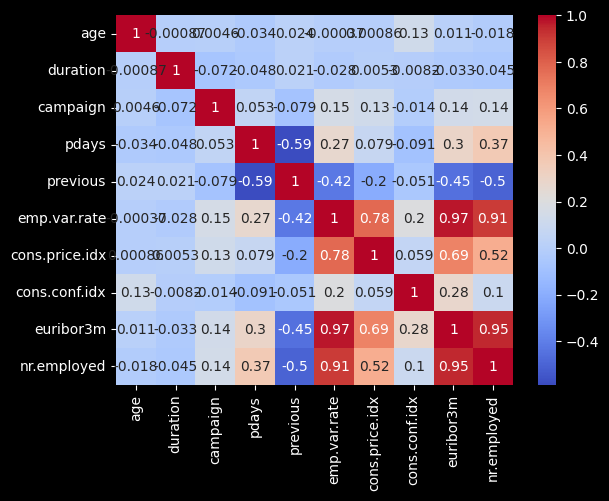

In [ ]:
sns.heatmap(data.select_dtypes('number').corr(method='pearson'), cmap='coolwarm', annot=True)

As we can see , the some of the indexes (euribor3m-emp.var.rate) and (emp.var.rate-nr.employed) are really correlated.

Let's check the covariance in our data between pairs of fields.

<AxesSubplot: >

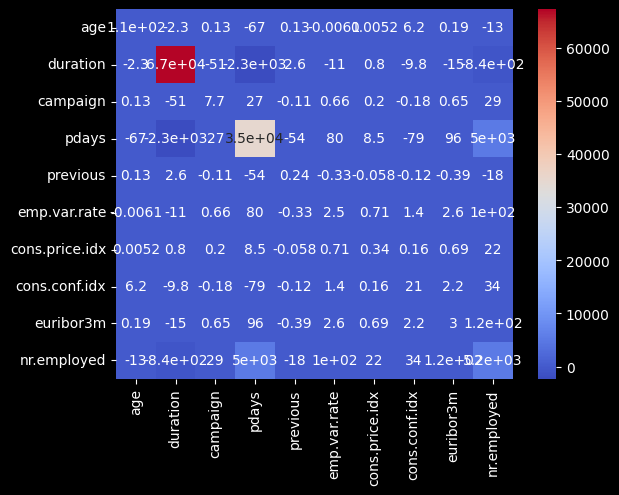

In [ ]:
sns.heatmap(data.select_dtypes('number').cov(), cmap='coolwarm', annot=True)

Let's create some scatter plots to check if there is any other correlation in our data.

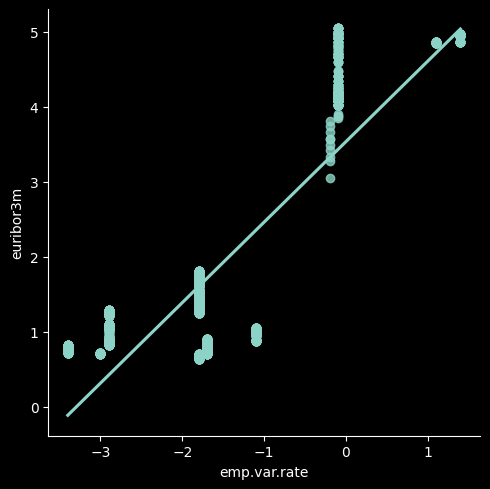

In [ ]:
sns.lmplot(x="emp.var.rate", y="euribor3m", data=data, )

The plot shows there is a slight correlation between 'emp.var.rate' and 'euribor3m' , based on the line fit , but as we can see the points dont follow the line that fits the data.

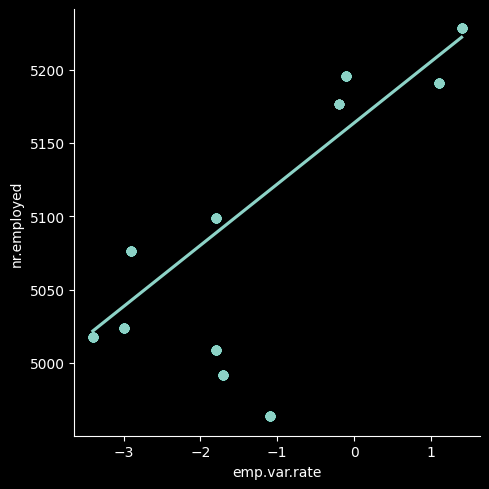

In [ ]:
sns.lmplot(x="emp.var.rate", y="nr.employed", data=data, )

Once again , we can tell there is some correlation but the line fit is not a good approximation.